#  第三讲 随机网络

In [12]:
from matplotlib import pyplot as plt

import numpy as np

import networkx as nx

## 1、几种常见的规则网络的生成与可视化

In [13]:
n = 10

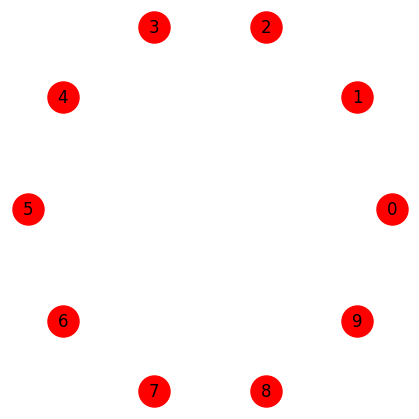

In [14]:
# 孤立节点图
G1 = nx.Graph()
plt.figure(figsize=(4,4))
G1.add_nodes_from(list(range(n)))
nx.draw(G1, pos=nx.circular_layout(G1), node_size=500, node_color="red",with_labels=True)

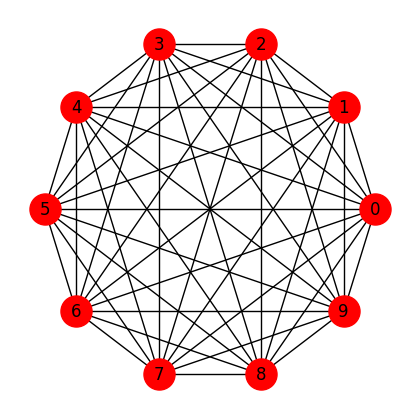

In [15]:
# 创建完全图
G2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G2, pos=nx.circular_layout(G2), node_size=500, node_color="red",with_labels=True)

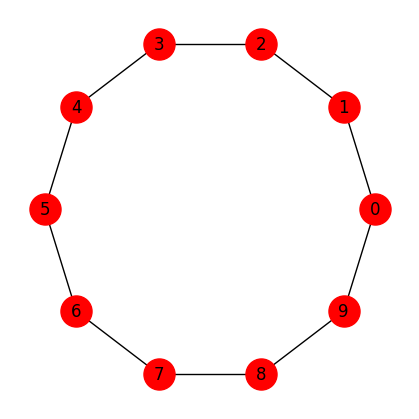

In [16]:
# 一维环状图
G3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G3, pos=nx.circular_layout(G3), node_size=500, node_color="red",with_labels=True)

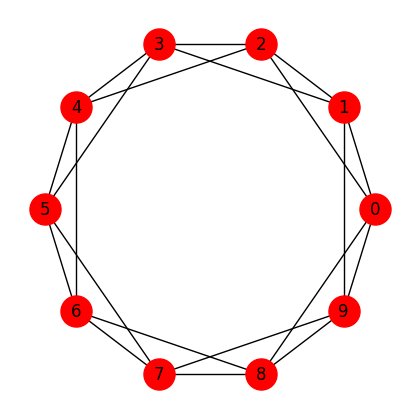

In [17]:
# K近邻规则(耦合)图
G4 = nx.watts_strogatz_graph(n,4,0)
plt.figure(figsize=(4,4))
nx.draw(G4, pos=nx.circular_layout(G4), node_size=500, node_color="red",with_labels=True)

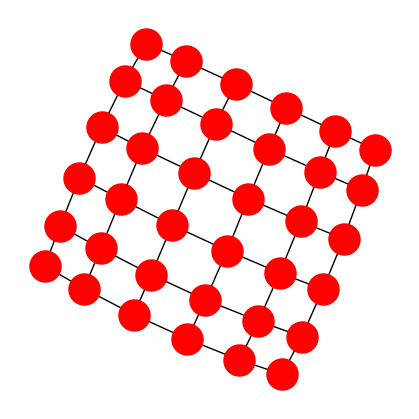

In [18]:
# 二维方格图
G5 = nx.grid_graph((6,6), periodic=False)
plt.figure(figsize=(4,4))
nx.draw(G5, node_size=500, node_color="red",with_labels=False)
plt.savefig("二维方格图.pdf")

## 2、随机网络的两种生成算法

### 第一种：G(N,L)

In [19]:
import itertools

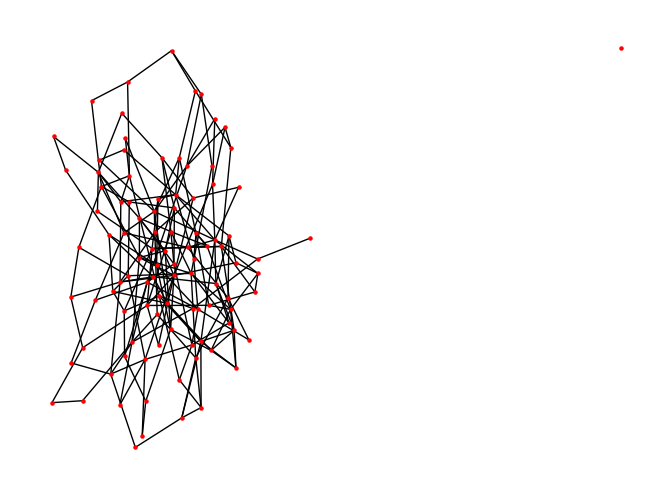

In [20]:
def GNL(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    nlist = list(G)
    edge_count = 0
    while edge_count < L:
        # generate random edge,u,v
        u = np.random.choice(nlist)
        v = np.random.choice(nlist)
        if u == v or G.has_edge(u, v):
            continue
        else:
            G.add_edge(u, v)
            edge_count += 1
    return G

G1 = GNL(100, 200)
nx.draw(G1, node_size=5, node_color="red",with_labels=False)

### 第二种：G(N,p)

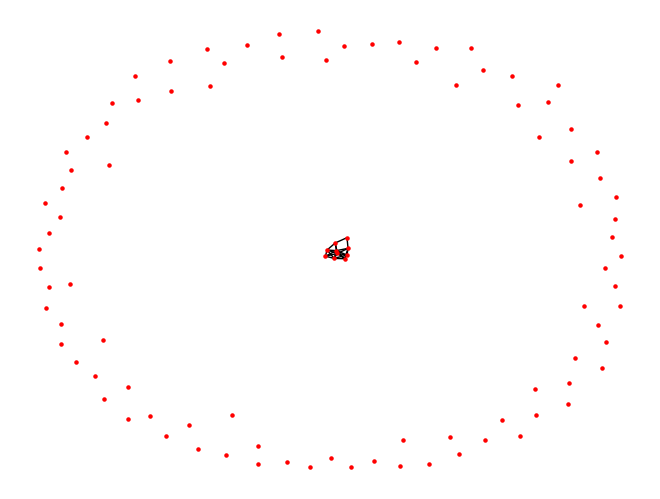

In [21]:
def GNP(N, p):
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for e in edges:
        if np.random.random() < p:
            G.add_edge(*e)
    return G

G2 = GNP(100, 0.6)
nx.draw(G2, node_size=5, node_color="red",with_labels=False)

Text(0.5, 1.0, 'G(N,p)')

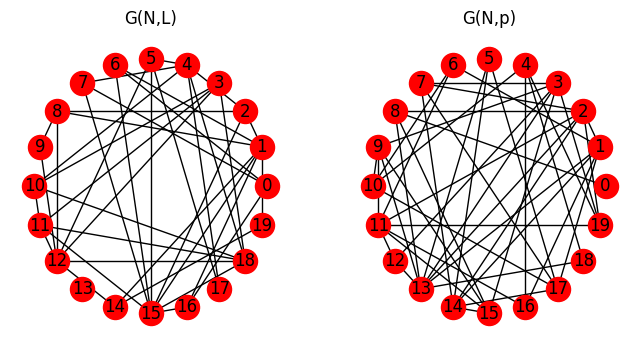

In [22]:
# 可以直接调用库函数来生成这两种网络
n, m, p = 20,40,0.2
g1 = nx.gnm_random_graph(n, m)
g2 = nx.gnp_random_graph(n, p)

plt.figure(figsize=(8,4))

plt.subplot(121)
nx.draw(g1, pos=nx.circular_layout(g1), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,L)")

plt.subplot(122)
nx.draw(g2, pos=nx.circular_layout(g2), node_size=300, node_color="red",with_labels=True)
plt.title("G(N,p)")